# Clustering with PCA and K-Means on Mall Customer Data
This notebook demonstrates how to use Principal Component Analysis (PCA) for dimensionality reduction before applying K-Means clustering on the Mall Customers dataset.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Mall Customer Data
# If you do not have the dataset, download it from: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial
# Place the file as 'Mall_Customers.csv' in the current directory.
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Explore and Preprocess Data
# Display basic info and check for missing values
df.info()
df.isnull().sum()
# Select numeric features for clustering (excluding 'CustomerID' and categorical columns)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Standardization is a common preprocessing step in machine learning pipelines because many algorithms perform better when input features are on a similar scale. For example, algorithms that use distance calculations (like KMeans or PCA) can be biased if one feature has a much larger scale than others.

In [4]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.44266167 0.33308378]


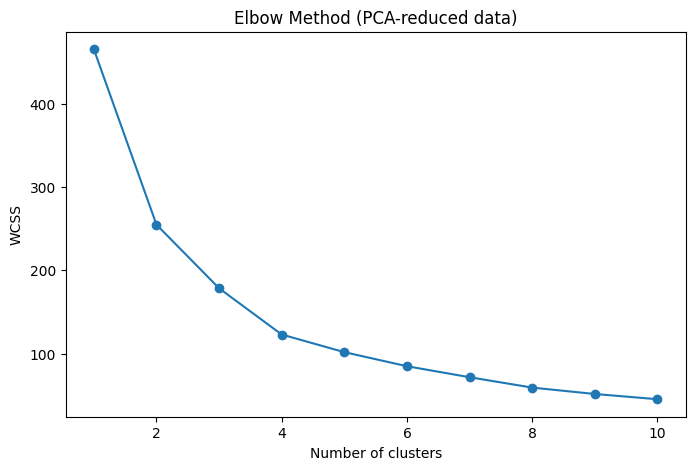

In [10]:
# Apply K-Means Clustering on PCA-reduced data
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (PCA-reduced data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Fit KMeans with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

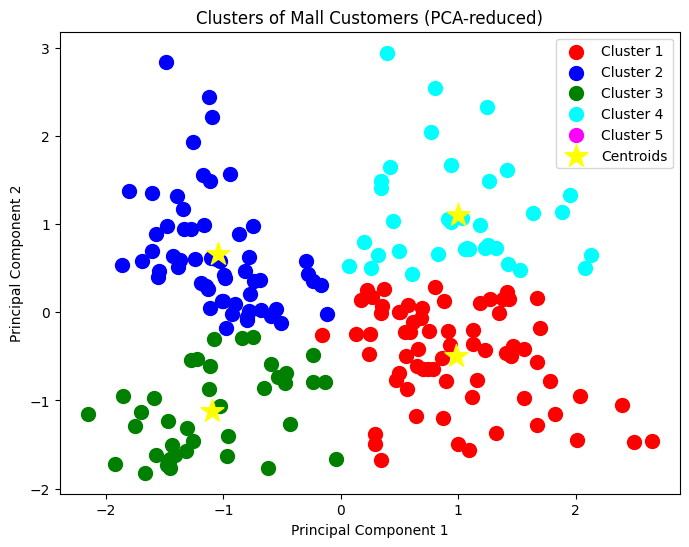

In [11]:
# Visualize Clusters in 2D (PCA components)
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters of Mall Customers (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()